<a href="https://colab.research.google.com/github/shaad4224/credit_card_default_prediction/blob/main/Copy_of_credit_card_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name** - Credit Card Default Prediction

###**Project Type** - Classification
###**Contribution** - Individual
###**Submitted by** - Shadab Husain

##**Project Summary** -


In recent years, the credit card issuers in Taiwan faced the cash and credit card debt crisis and the delinquency is expected to peak in the third quarter of 2006 (Chou,2006). In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash–card debts. The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders.

This Project Aims to create a predictive model that will help banks to predict whether the user default next month. Which will further help them to take prevention measures.

**Our Project Workflow:**

*  Importing Libraries

*  Loading the dataset

*  Data Cleaning

*  EDA on features

*  Hypothesis Testing

*  Feature selection

*  Fitting the classification models

*  HyperParameter Tuning

*  Evaluation Metrices of the model

*  Final selection of the model

*  Conclusion

**Libraries we will use to perform these:**

*  Data wrangling : Numpy and Pandas

*  Data Visualization : Matplotlib and Seaborn

*  Hypothesis Testing: Scipy

*  Machine learning : Scikit Learn and XGBoost



##**GitHub Link** -

https://github.com/shaad4224/credit_card_default_prediction.git

##**Problem Statement**

**We are required to do:**

*  Understand, prep the data and make it ready for training.

*  Understand the target feature and its distribution

*  Assessing target features for class imbalance.

*  Modeling

*  Evaluation while keeping class imbalance in mind.

*  Feature Importance and Conclusion

*  Understanding how this project is useful to stakeholders.

##**Let's Begin !**

##**1. Know Your Data**

###Import Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

###Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/capstone/default of credit card clients.xls - Data.xlsx - default of credit card clients..csv')

###Dataset First View

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


###Dataset Rows & Columns count

In [5]:
df.shape

(30000, 25)

###Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

###Duplicate Values

In [7]:
len(df[df.duplicated()])

0

###Missing Values/Null Values

In [8]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

###What did you know about your dataset?

There are around information of three thousand people and have 24 features to explain it. Data has no duplicate values and missing values so, Now our data is clean. lets move further.


##**2. Understanding Your Variables**

In [9]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


###Variables Description

This information was not available AlmaBetter. So I procured this from https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

*  ID: ID of each client
*  LIMIT_BAL: Amount of given credit in NT dollars (includes individual  and      family/supplementary credit
*  SEX: Gender (1=male, 2=female)
*  EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
*  MARRIAGE: Marital status (1=married, 2=single, 3=others)
*  AGE: Age in years
*  PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)
*  PAY_2: Repayment status in August, 2005 (scale same as above)
*  PAY_3: Repayment status in July, 2005 (scale same as above)
*  PAY_4: Repayment status in June, 2005 (scale same as above)
*  PAY_5: Repayment status in May, 2005 (scale same as above)
*  PAY_6: Repayment status in April, 2005 (scale same as above)
*  BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
*  BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
*  BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
*  BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
*  BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
*  BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
*  PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
*  PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
*  PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
*  PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
*  PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
*  PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

###Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in df.columns:
  print("Unique values of",i,"is",df[i].nunique())

Unique values of ID is 30000
Unique values of LIMIT_BAL is 81
Unique values of SEX is 2
Unique values of EDUCATION is 7
Unique values of MARRIAGE is 4
Unique values of AGE is 56
Unique values of PAY_0 is 11
Unique values of PAY_2 is 11
Unique values of PAY_3 is 11
Unique values of PAY_4 is 11
Unique values of PAY_5 is 10
Unique values of PAY_6 is 10
Unique values of BILL_AMT1 is 22723
Unique values of BILL_AMT2 is 22346
Unique values of BILL_AMT3 is 22026
Unique values of BILL_AMT4 is 21548
Unique values of BILL_AMT5 is 21010
Unique values of BILL_AMT6 is 20604
Unique values of PAY_AMT1 is 7943
Unique values of PAY_AMT2 is 7899
Unique values of PAY_AMT3 is 7518
Unique values of PAY_AMT4 is 6937
Unique values of PAY_AMT5 is 6897
Unique values of PAY_AMT6 is 6939
Unique values of default payment next month is 2


In [12]:
#category wise values
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [13]:
#category wise values
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [14]:
#age wise values of credit card holder
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

Unique values of these variable differ from the information available. lets treat them.

##**3. Data Wrangling**


**This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following variables as explanatory variables**:

**ID**: Unique ID of each client

**LIMIT_BAL**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

**Gender**: 1 = male; 2 = female

**Education:** 1 = graduate school; 2 = university; 3 = high school; 4 = others
Marital status: 1 = married; 2 = single; 3 = others).

**Age:** Age in years

###**History of past payment**.

**We tracked the past monthly payment records from April to September, 2005.The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.**

**PAY_0**: Repayment status in September, 2005

**PAY_2:** Repayment status in August, 2005

**PAY_3:** Repayment status in July, 2005

**PAY_4:** Repayment status in June, 2005

**PAY_5:** Repayment status in May, 2005

**PAY_6:** Repayment status in April, 2005

###**Amount of bill statement (NT dollar).**

**BILL_AMT1:** Amount of bill statement in September, 2005

**BILL_AMT2:** Amount of bill statement in August, 2005

**BILL_AMT3:** Amount of bill statement in July, 2005

**BILL_AMT4:** Amount of bill statement in June, 2005

**BILL_AMT5:** Amount of bill statement in May, 2005

**BILL_AMT6:** Amount of bill statement in April, 2005

###**Amount of previous payment (NT dollar).**

**PAY_AMT1:** Amount of previous payment in September, 2005

**PAY_AMT2:** Amount of previous payment in August, 2005

**PAY_AMT3:** Amount of previous payment in July, 2005

**PAY_AMT4:** Amount of previous payment in June, 2005

**PAY_AMT5:** Amount of previous payment in May, 2005

**PAY_AMT6:** Amount of previous payment in April, 2005

**default.payment.next.month:** Default payment (1=yes, 0=no)

In [15]:
df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [16]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [17]:
df['IsDefaulter'].value_counts()

0    23364
1     6636
Name: IsDefaulter, dtype: int64

Data Wrangling Code

In [18]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [19]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

###What all manipulations have you done and insights you found?

I have treated the some variable with different unique variables than shown in variable description.

##**4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

####Defaulter vs Non Defaulter

##Chart1

Text(0.5, 0, 'IsDefaulter  0:No   1: Yes')

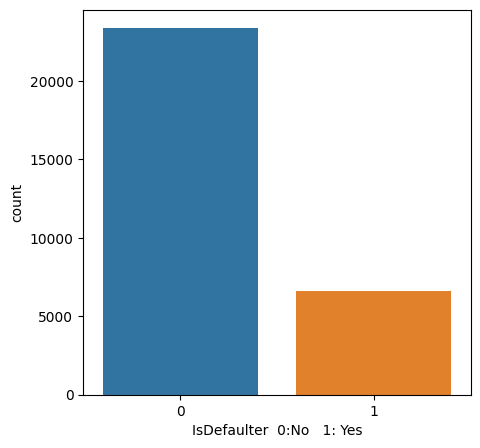

In [20]:
#values count plot of IsDefaulter
plt.figure(figsize=(5,5))
sns.countplot(x = 'IsDefaulter', data = df)
plt.xlabel('IsDefaulter  0:No   1: Yes')

**1. Why did you pick the specific chart?**

This gives us clear picture of distribution of our Target Variable.

**2. What is/are the insight(s) found from the chart?**

Around more than 5000 of the payments are default. Its a huge number.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

This chart actually gives us motive to make a prediction model. so that these transections should be stopped.

####Male vs Female

##Chart2

Text(0.5, 0, 'Sex  1:Male   2: Female')

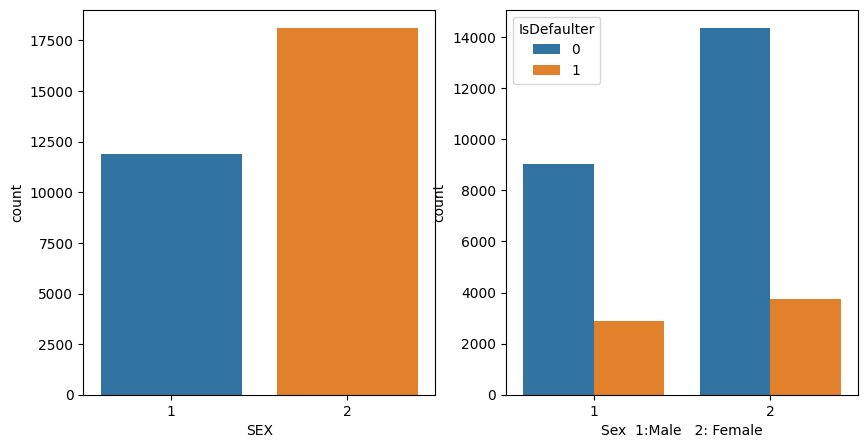

In [21]:
#count plot for Sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = df)
sns.countplot(x = 'SEX', hue = 'IsDefaulter',ax = axes[1], data = df)
plt.xlabel('Sex  1:Male   2: Female')

**1. Why did you pick the specific chart?**

It shows the difference between male and female default ratio.

**2. What is/are the insight(s) found from the chart?**

It is clear that female tend to have more defaults than male. Females are the major user of credit cards.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Females are the major revenue for credit cards. Banks need to create some new policies to reduce the defaults.

##Chart3

Text(0.5, 0, 'Education  1:Graduate   2: University 3:High school 4:Others')

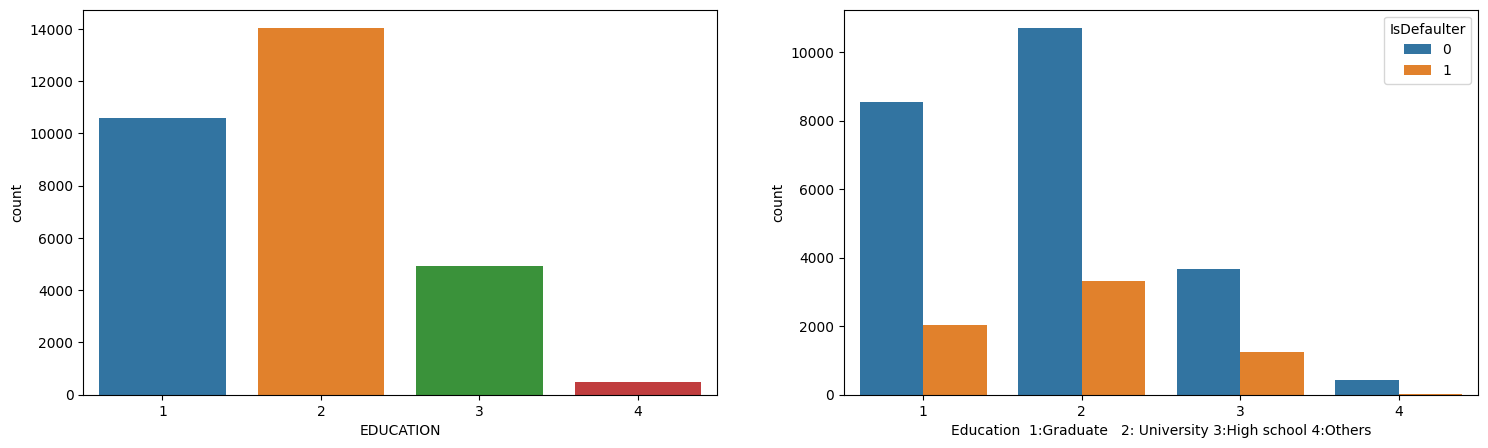

In [22]:
#count plot for EDUCATION and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = df)
sns.countplot(x = 'EDUCATION', hue = 'IsDefaulter',ax = axes[1], data = df)
plt.xlabel('Education  1:Graduate   2: University 3:High school 4:Others')

**1. Why did you pick the specific chart?**

It shows the literate group that mostly found to default.

**2. What is/are the insight(s) found from the chart?**

University students are highest to use credit cards and to default as well followed by gradute school and high school.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Banks should put on regulations on the basis of education and background.

##Chart4

Text(0.5, 0, 'Marriage  1:Married   2: Single 3:Others')

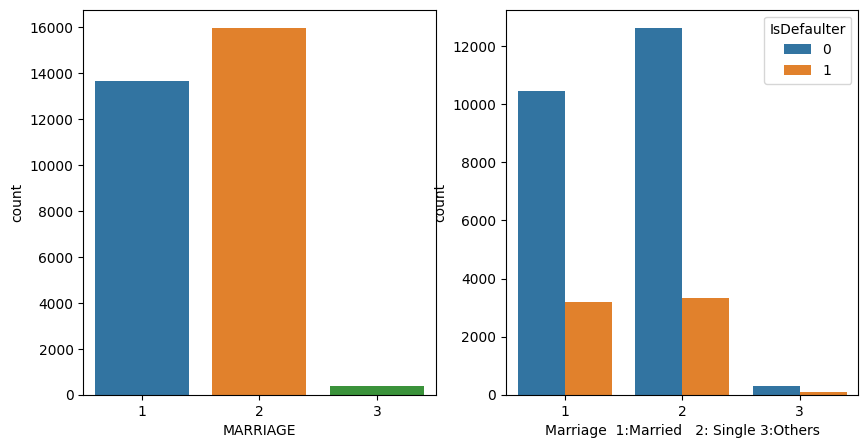

In [23]:
#count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = df)
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter',ax = axes[1], data = df)
plt.xlabel('Marriage  1:Married   2: Single 3:Others')

**1. Why did you pick the specific chart?**

This chart depicts the marital status of credit card holders.

**2. What is/are the insight(s) found from the chart?**

Unmarried people tend to have more credit cards than married but the difference is not that much.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

There is no significant differece between married and unmarried people getting default. It does not signify any business impact as per data.

####Age Group

##Chart5

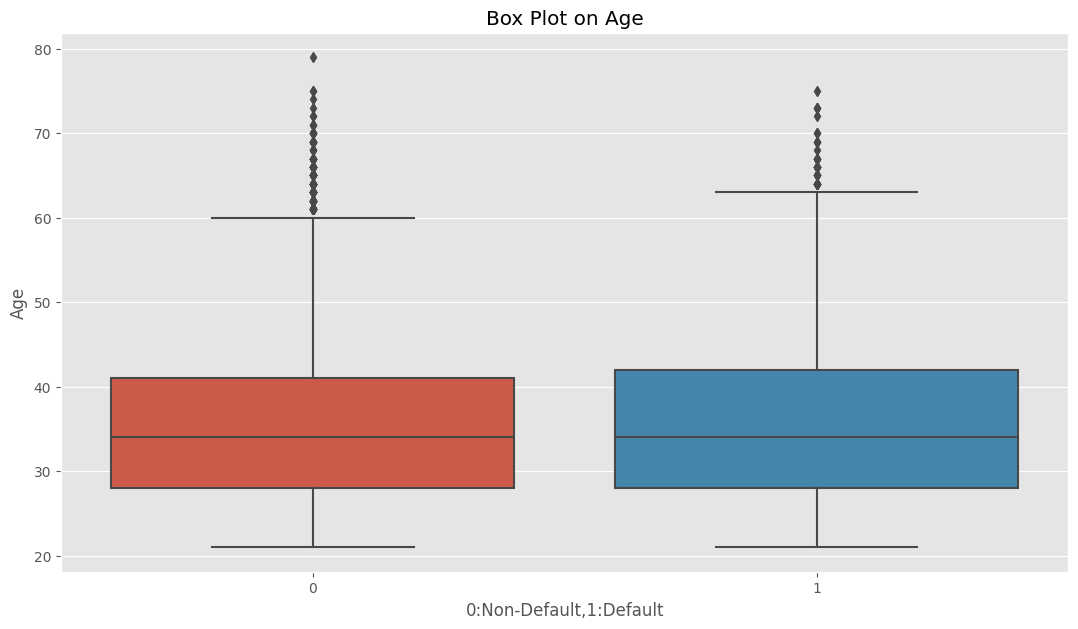

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Box Plot on Age")
sns.boxplot(x='IsDefaulter',y='AGE',data=df)
plt.ylabel("Age")
plt.xlabel('0:Non-Default,1:Default')
plt.show()

**1. Why did you pick the specific chart?**

this chart depicts the age group of most number of users.

**2. What is/are the insight(s) found from the chart?**

Major number of users are aged from 30 to 40 years and even defaulters are in the same group.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Banks can target different age group by providing various offer to increase revenue. Here, Defaulters and Non-Defaulters are in the same age group, so this insight do contribute to business.

##Chart6

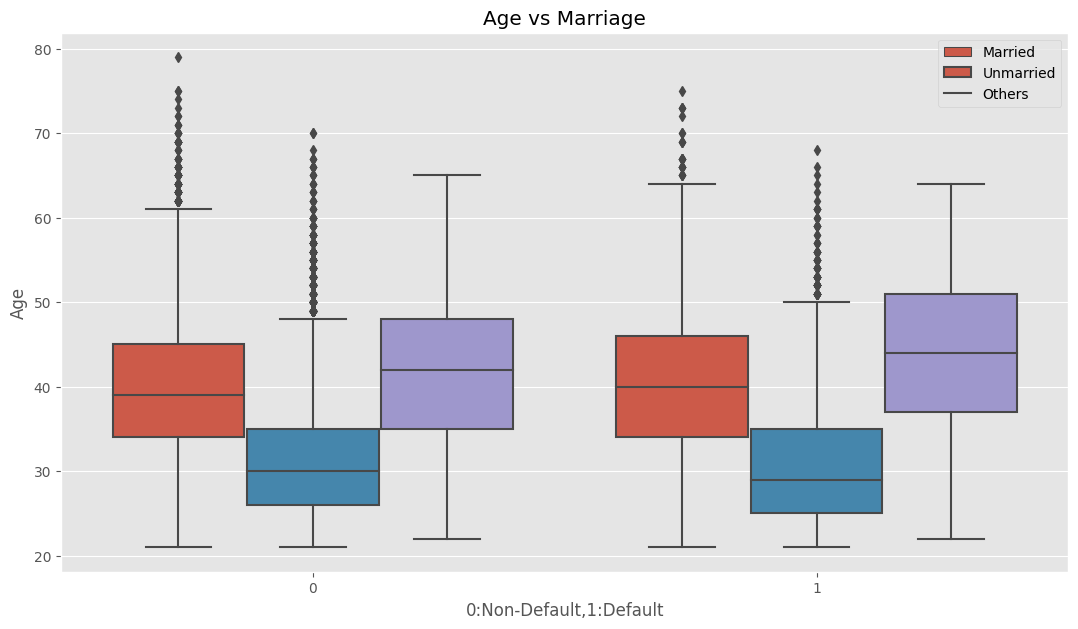

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Age vs Marriage")
sns.boxplot(x='IsDefaulter',hue='MARRIAGE', y='AGE',data=df)
plt.ylabel("Age")
plt.xlabel('0:Non-Default,1:Default')
plt.legend(['Married','Unmarried','Others'])
plt.show()

**1. Why did you pick the specific chart?**

This multivariate analysis helps us to get different age group according to their marital stauts.

**2. What is/are the insight(s) found from the chart?**

Most married users using credit cards are aged between 35 to 45 and unmarried users are aged between 25 to 35. where as others are aged between 35 to 50. That can be possible that they married users.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

The age group is same in both cases. so it does not give business impact.

##Chart7

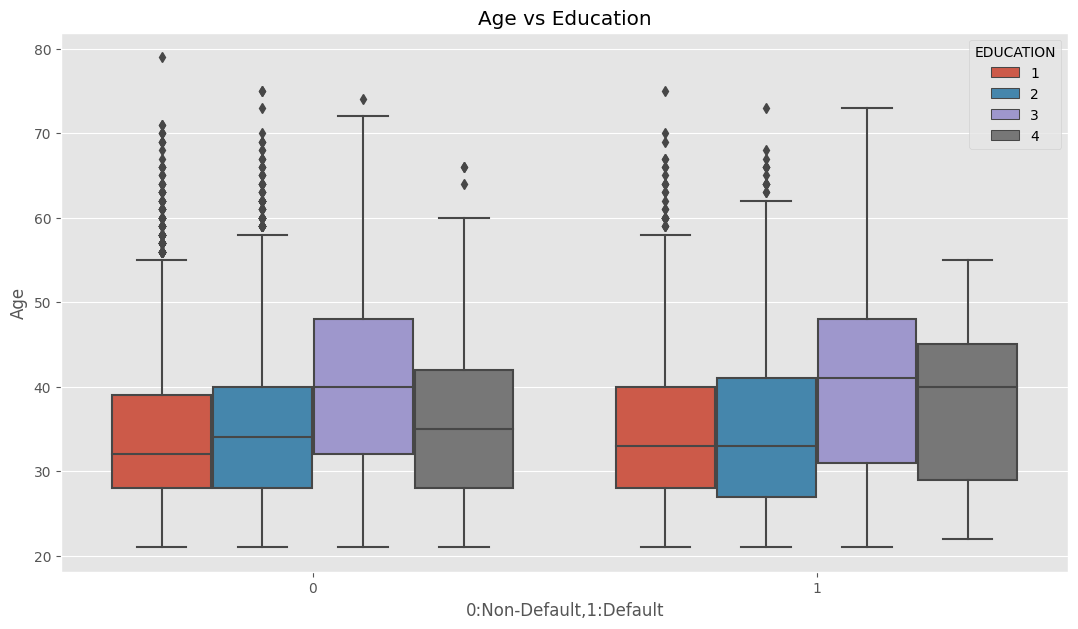

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Age vs Education")
sns.boxplot(x='IsDefaulter',hue='EDUCATION', y='AGE',data=df)
plt.ylabel("Age")
plt.xlabel('0:Non-Default,1:Default')
plt.show()

**1. Why did you pick the specific chart?**

It depicts the age group on the basis of education.

**2. What is/are the insight(s) found from the chart?** 

Interestingly, high school group is aged more, ranges from 35 to 45. it tend to deafualt the same.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Even This chart does not help us finding the difference between deafualts and non defaulters.

##Chart8

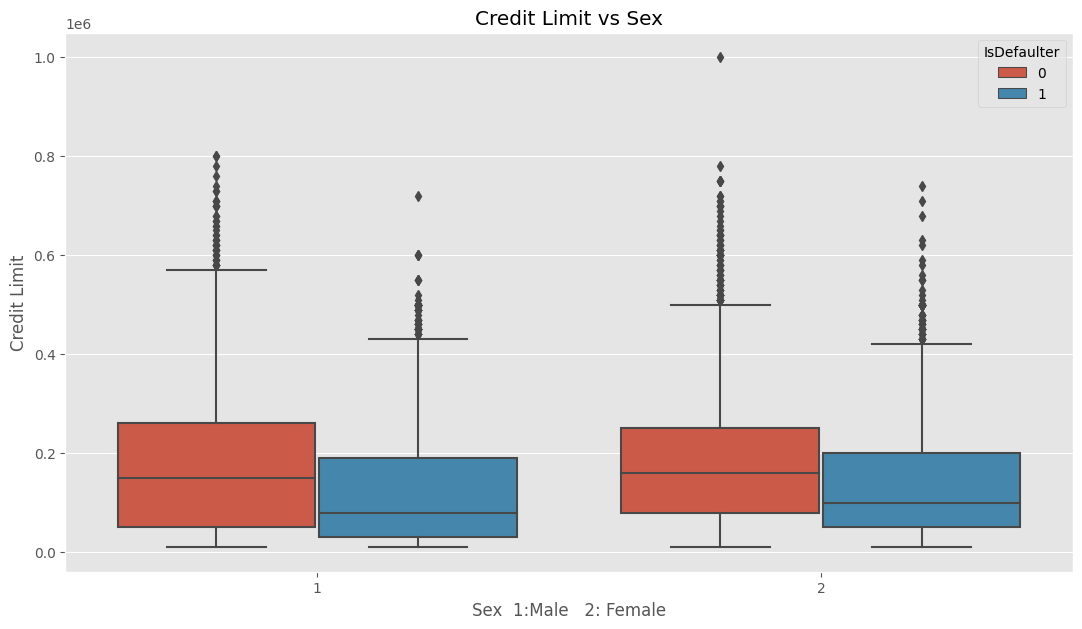

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Credit Limit vs Sex")
sns.boxplot(x='SEX',y='LIMIT_BAL',hue='IsDefaulter',data=df)
plt.ylabel("Credit Limit")
plt.xlabel('Sex  1:Male   2: Female')
plt.show()

**1. Why did you pick the specific chart?**

This chart shows us the major diffence between defaulters and no defaulters credit range while considering the sex.

**2. What is/are the insight(s) found from the chart?**

Defaulters have less credit limit than non defaulters not going avove 20000 Dollors.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Users with less limit tend to default more. Banks can create the lower limit so that some defaulters can be eliminated.

##Chart9

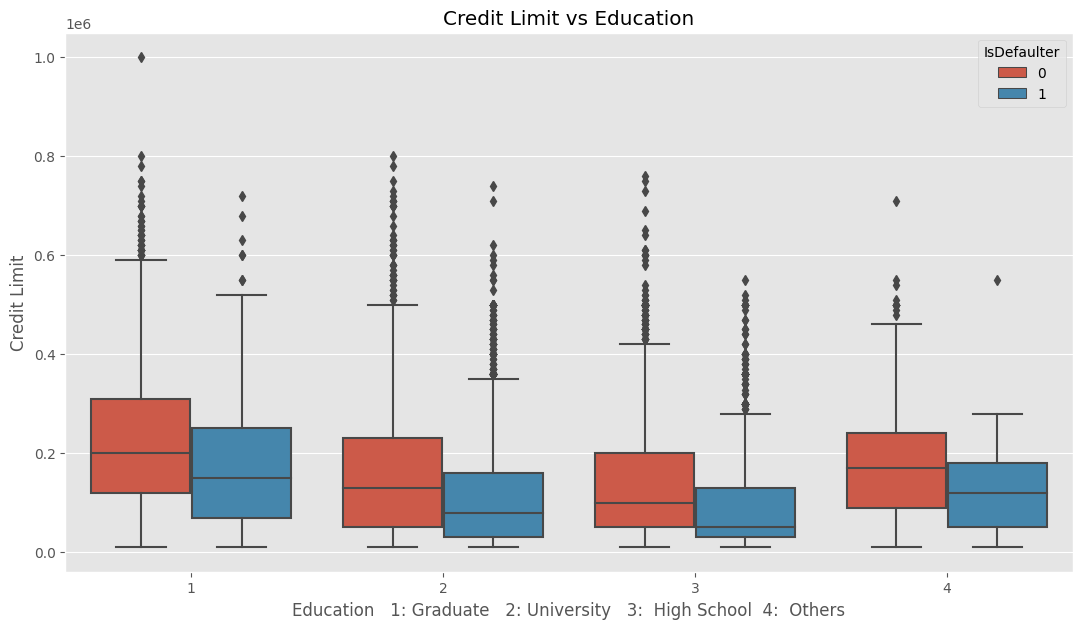

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Credit Limit vs Education")
sns.boxplot(x='EDUCATION',y='LIMIT_BAL',hue='IsDefaulter',data=df)
plt.ylabel("Credit Limit")
plt.xlabel('Education   1: Graduate   2: University   3:  High School  4:  Others')
plt.show()

**1. Why did you pick the specific chart?**

This chart shows the credit limit of different education group white considering default payment.

**2. What is/are the insight(s) found from the chart?**

Credit limit is majorly more in graduated users and lowest in high school users.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

In previous charts it is shown that high school group is aged the most and here the credit limit of the higher school is less. That clearly states more the age lesser the credit limit.

##Chart10

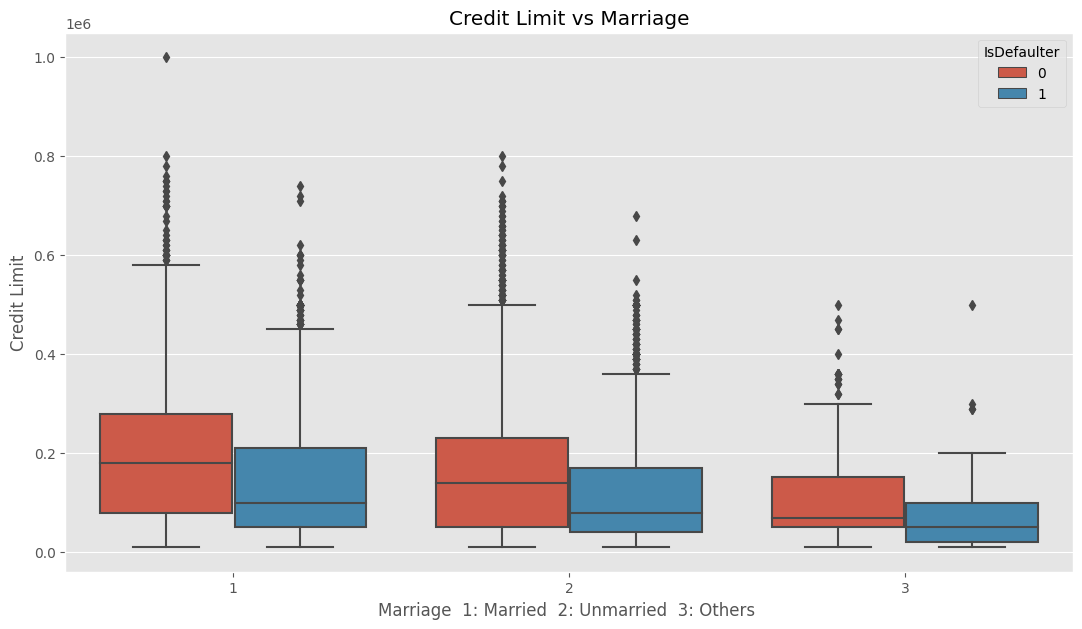

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Credit Limit vs Marriage")
sns.boxplot(x='MARRIAGE',y='LIMIT_BAL',hue='IsDefaulter',data=df)
plt.ylabel("Credit Limit")
plt.xlabel('Marriage  1: Married  2: Unmarried  3: Others ')
plt.show()

**1. Why did you pick the specific chart?**

This chart shows credit limit of users of different marital status while considering the defaults.

**2. What is/are the insight(s) found from the chart?**

Married user tend to have more credit limit than unmarried users. defaulters in married users do have more credit limit.

**3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

here also, a lower limit should be decided. when issuing a credit card with less amount, a backgroud check should retictly followed.

##Chart11

Text(0.5, 1.0, 'Heatmap')

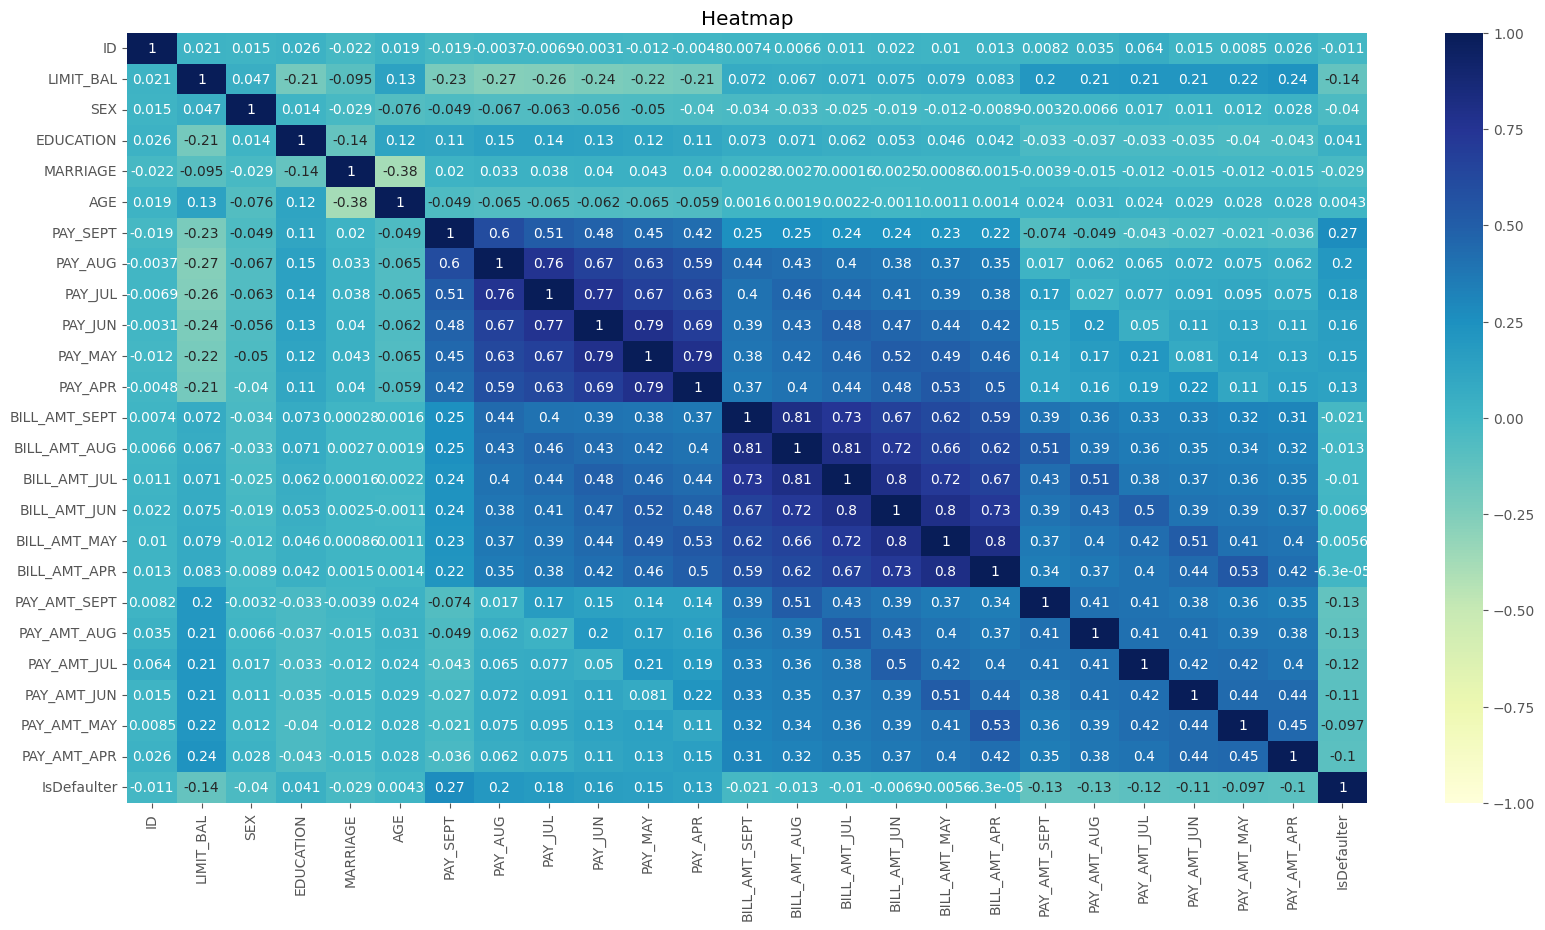

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.astype(float).corr(method='kendall'), cmap="YlGnBu", annot=True,vmin=-1,vmax=1)
plt.title('Heatmap')

**1. Why did you pick the specific chart?**

This chart shows the correlation between each factors.

**2. What is/are the insight(s) found from the chart?**

There is not strong correlation between fetures except bill amount and payment made, that totally make sense.

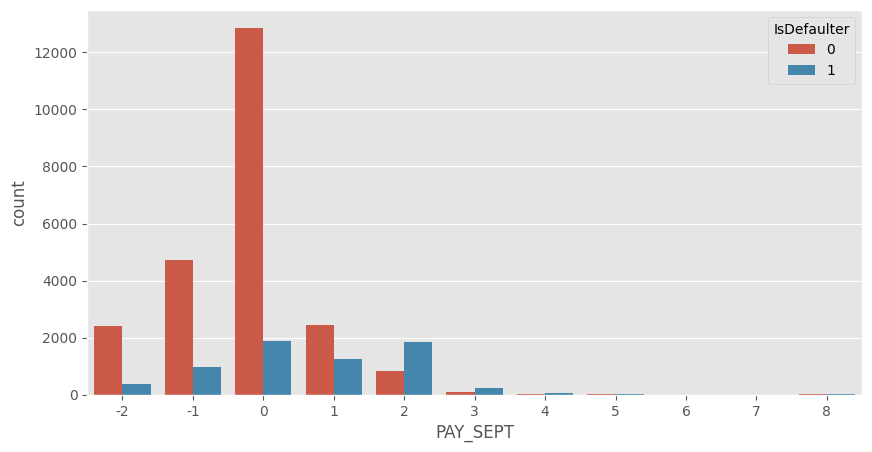

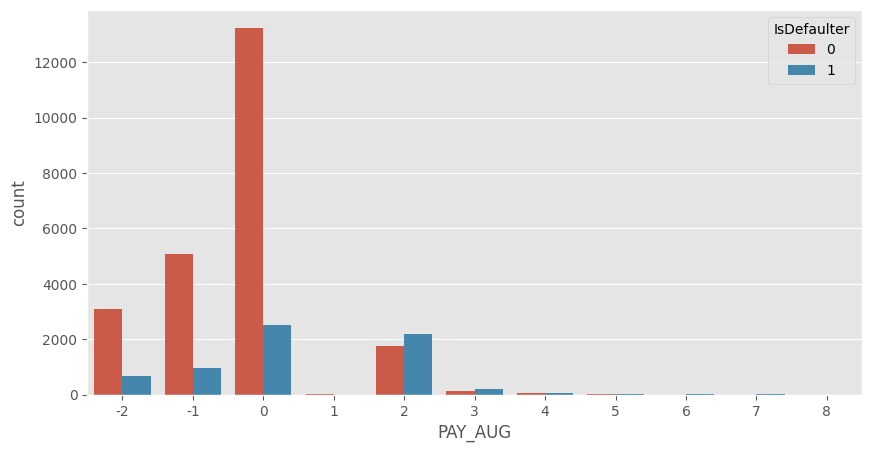

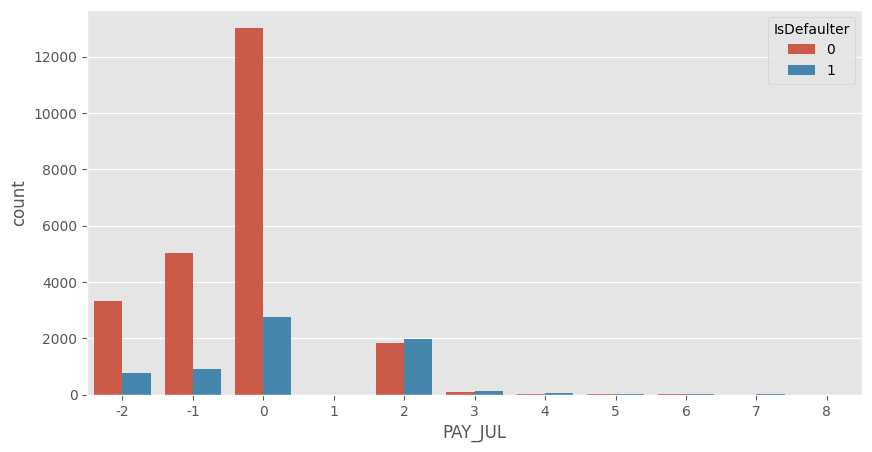

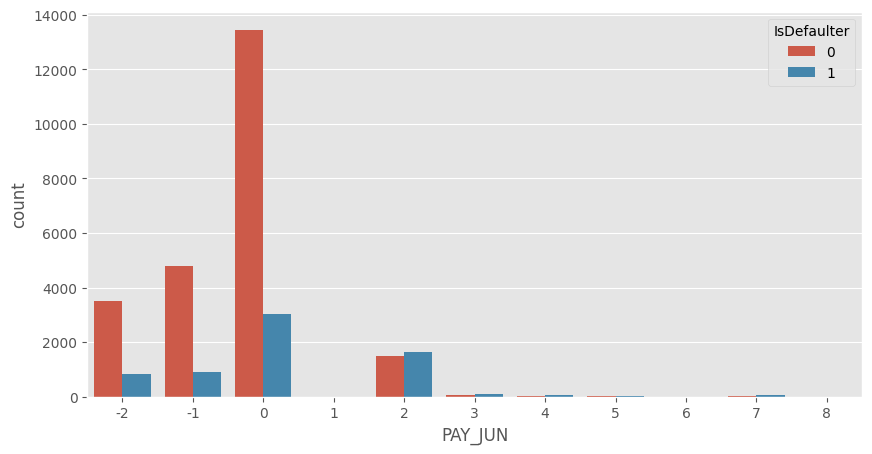

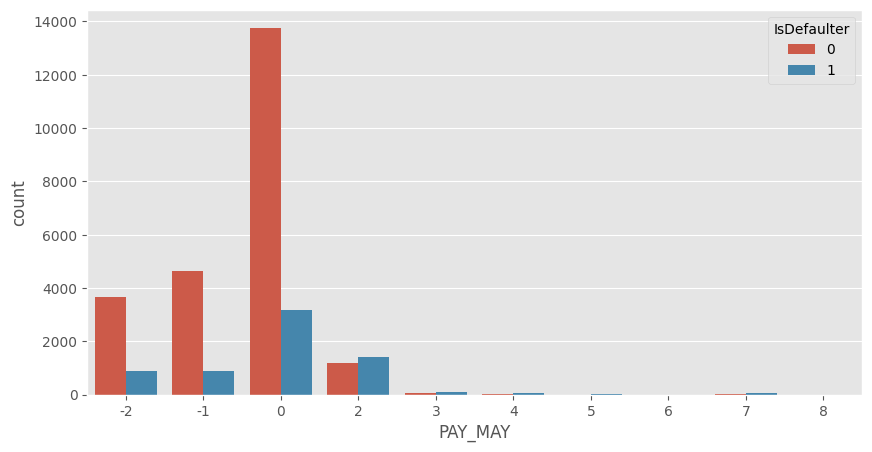

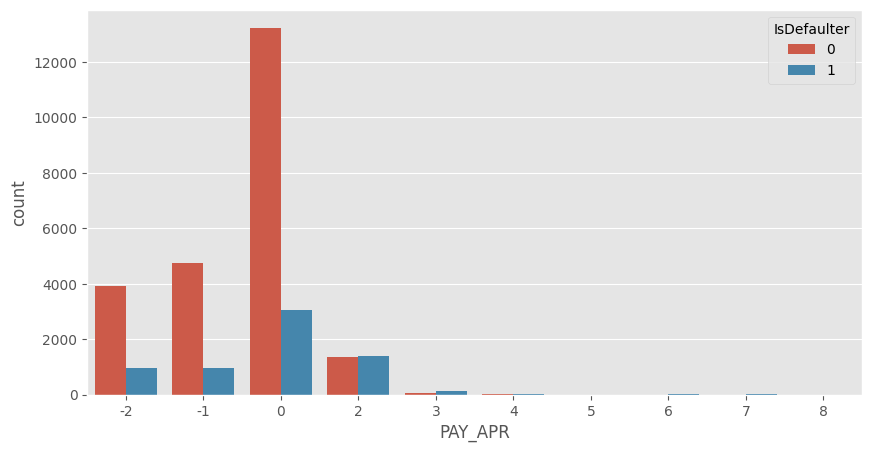

In [ ]:
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'IsDefaulter', data = df)

**1. Why did you pick the specific chart?**

The above figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.

**2. What is/are the insight(s) found from the chart?**

Most of the payments are paid duly. Majorly time delayed to pay is 2 months.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, delay after 2 months should not be tolerated and user can be charged.

##**5. Hypothesis Testing**


**Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.**

**Hypothetical Statement - 1**

**1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**

Null hypothesis: Maritial Status did not have any affect on default payment.

Alternate hypothesis: Maritial Status have affected default payment

**2. Perform an appropriate statistical test.**

In [ ]:
# Perform Statistical Test to obtain P-Value
married_sample = np.array([np.mean(df[df["MARRIAGE"]==1].sample(20)["IsDefaulter"].values) for i in range(100)])
single_sample = np.array([np.mean(df[df["MARRIAGE"]==2].sample(20)["IsDefaulter"].values) for i in range(100)])

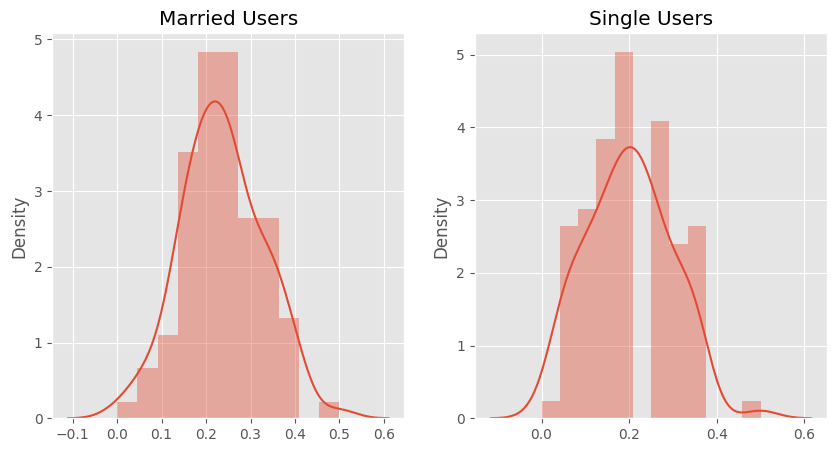

In [ ]:
import scipy.stats
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(married_sample)
plt.title("Married Users")
plt.subplot(1, 2, 2)
sns.distplot(single_sample)
plt.title("Single Users")
plt.show()

Our samples are normally distributed, we can calculate z score here. Lets keep our significance level at 5%.

In [ ]:
effect = np.mean(single_sample) - np.mean(married_sample)
sigma_first = np.std(single_sample)
sigma_third = np.std(married_sample)
sigma_difference = np.sqrt((sigma_first**2)/len(single_sample)  +  (sigma_third**2)/len(married_sample))
z_score = effect / sigma_difference

In [ ]:
z_score

-2.7836470860143985

In [ ]:
#p-value
scipy.stats.norm.sf(abs(z_score))*2

0.005375148473534986

We have obtained p-value to be more that 5%, hence we accept our null hypothesis.

**Which statistical test have you done to obtain P-Value?**

I have used z-score to calculate p-value.

**Why did you choose the specific statistical test?**

Our predictor varaible and Outcome variable is categorical thats why I have choosen this test.

###**Hypothetical Statement - 2**

**1. State Your research hypothesis as a null hypothesis and alternate hypothesis**.

Null Hypothesis: Gender did not have any affect on default payment.

Altenate Hypothesis: Gender has affectedd default payment.

**2. Perform an appropriate statistical test.**

In [ ]:
# Perform Statistical Test to obtain P-Value
male_sample = np.array([np.mean(df[df["SEX"]==1].sample(20)["IsDefaulter"].values) for i in range(100)])
female_sample = np.array([np.mean(df[df["SEX"]==2].sample(20)["IsDefaulter"].values) for i in range(100)])


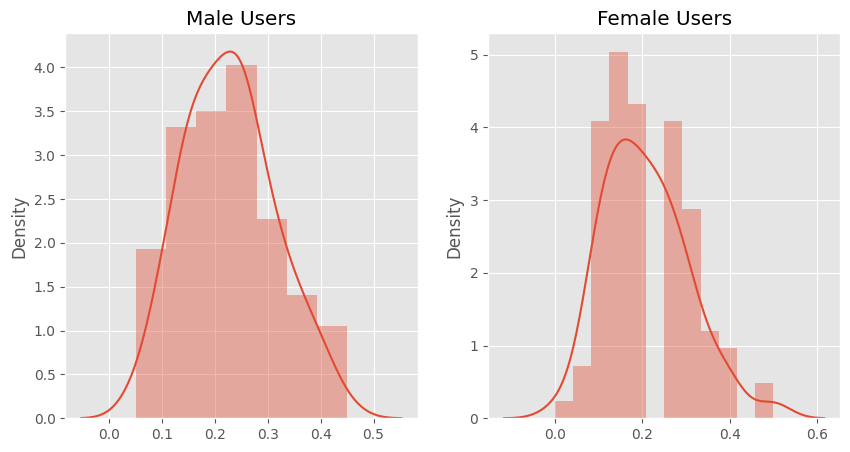

In [ ]:
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(male_sample)
plt.title("Male Users")
plt.subplot(1, 2, 2)
sns.distplot(female_sample)
plt.title("Female Users")
plt.show()

In [ ]:
effect = np.mean(female_sample) - np.mean(male_sample)
sigma_first = np.std(female_sample)
sigma_third = np.std(male_sample)
sigma_difference = np.sqrt((sigma_first**2)/len(female_sample)  +  (sigma_third**2)/len(male_sample))
z_score = effect / sigma_difference

In [ ]:
z_score

-1.5064878567626416

In [ ]:
scipy.stats.norm.sf(abs(z_score))*2

0.13194198209847574

P-value is very less. Hence, we reject our null hypthesis.

**Which statistical test have you done to obtain P-Value?**

I have used z-score to calculate p-value.

**Why did you choose the specific statistical test?**

Our predictor varaible and Outcome variable is categorical thats why I have choosen this test.

###**Hypothetical Statement - 3**

**1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**

Null Hypothesis: Education has no effect on default payment. Alternate Hypothesis: Education affected default payment.

**2. Perform an appropriate statistical test.**

In [ ]:
# Perform Statistical Test to obtain P-Value
graduate_sample = np.array([np.mean(df[df["EDUCATION"]==1].sample(20)["IsDefaulter"].values) for i in range(100)])
university_sample = np.array([np.mean(df[df["EDUCATION"]==2].sample(20)["IsDefaulter"].values) for i in range(100)])

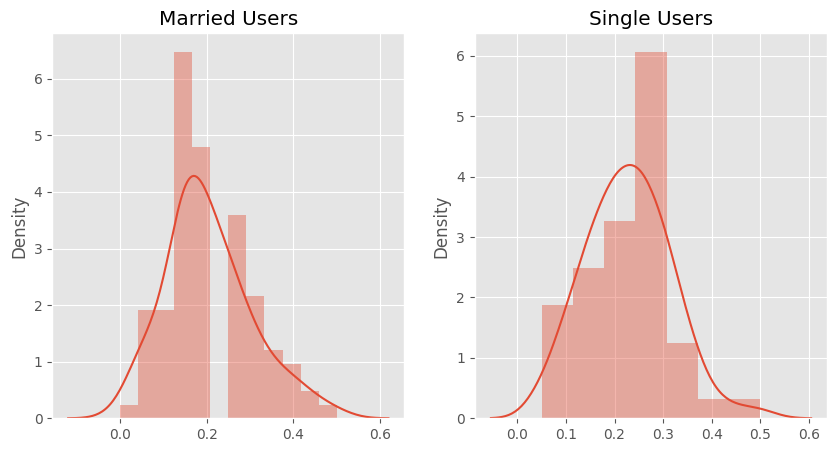

In [ ]:
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(graduate_sample)
plt.title("Married Users")
plt.subplot(1, 2, 2)
sns.distplot(university_sample)
plt.title("Single Users")
plt.show()

In [ ]:
effect = np.mean(university_sample) - np.mean(graduate_sample)
sigma_first = np.std(university_sample)
sigma_third = np.std(graduate_sample)
sigma_difference = np.sqrt((sigma_first**2)/len(university_sample)  +  (sigma_third**2)/len(graduate_sample))
z_score = effect / sigma_difference

In [ ]:
z_score

1.7830296999728938

In [ ]:
scipy.stats.norm.sf(abs(z_score))*2

0.07458146879584966

P-value is very less, We reject null hypothesis.

**Which statistical test have you done to obtain P-Value?**

I have used z-score to calculate p-value.

**Why did you choose the specific statistical test?**

Our predictor varaible and Outcome variable is categorical thats why I have choosen this test.

##**6. Feature Engineering & Data Pre-processing**

###**1. Handling Missing Values**

We dont have any missing values.



###**2. Data Scaling**


In [ ]:
# Scaling your data
df.columns = df.columns.map(str.lower)
col_to_norm = ['limit_bal', 'age', 'bill_amt_sept', 'bill_amt_aug', 'bill_amt_jul', 'bill_amt_jun',
       'bill_amt_may', 'bill_amt_apr', 'pay_amt_sept', 'pay_amt_aug', 'pay_amt_jul',
       'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr']
df[col_to_norm] =df[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [ ]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_sept,pay_aug,pay_jul,pay_jun,...,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sept,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,isdefaulter
0,1,-1.136720,2,2,1,-1.246020,2,2,-1,-1,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,2,-0.365981,2,2,2,-1.029047,-1,2,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,3,-0.597202,2,2,2,-0.161156,0,0,0,0,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,4,-0.905498,2,2,1,0.164303,0,0,0,0,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,5,-0.905498,1,2,1,2.334029,-1,0,-1,0,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


I have standarized data using z score fomulation.

##**7. ML Model Implementation**

In [ ]:

x = df.iloc[:,:-1].values
y = df['isdefaulter'].values
y=y.astype('int')
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

###**Logistic Regression**

In [ ]:
#fitting data into Logistic Regression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(x_train,y_train)
     
LogisticRegression(random_state=1)

y_pred = logmodel.predict(x_test)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [ ]:
# Visualizing evaluation Metric Score chart
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm0 = confusion_matrix(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.802,0.702602,0.189,0.297872,0.583071


###**2. Cross- Validation & Hyperparameter Tuning**

In [ ]:
logmodel_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(estimator=logmodel,param_grid=logmodel_params,scoring='accuracy',cv=10,n_jobs=-1)
grid_search_log = grid_search.fit(x_train,y_train)
best_accuracy = grid_search_log.best_score_
print('Accuracy on Cross Validation set :',best_accuracy)
best_parameters = grid_search_log.best_params_
print('Best parameters are:',best_parameters)
y_pred_log = grid_search_log.predict(x_test)
roc=roc_auc_score(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
cm1 = confusion_matrix(y_test, y_pred_log)
results2 =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results= results.append(results2, ignore_index = True)
results

Accuracy on Cross Validation set : 0.806904761904762
Best parameters are: {'C': 1, 'class_weight': None, 'penalty': 'l2'}


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.802,0.702602,0.189,0.297872,0.583071
1,Logistic Regression Tuned,0.802,0.702602,0.189,0.297872,0.583071


**Which hyperparameter optimization technique have you used and why?**

I have used GridsearchCv to find the best parameters for model.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

Model has not improved, So I  had believe base model was working well.

###**K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = knn.predict(x_test)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [ ]:
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred)

results2 = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results= results.append(results2, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.802000,0.702602,0.1890,0.297872,0.583071
1,Logistic Regression Tuned,0.802000,0.702602,0.1890,0.297872,0.583071
2,K-Nearest Neighbour,0.763778,0.323034,0.0575,0.097623,0.511536


###**2. Cross- Validation & Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
knn_param = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}
random_search = RandomizedSearchCV(estimator = knn,param_distributions = knn_param,scoring='accuracy',cv=5,n_jobs=-1)
random_search = random_search.fit(x_train,y_train)
best_accuracy_1 = random_search.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)
best_parameters = random_search.best_params_
print("Best Parameters are",best_parameters)
y_pred_KNN = random_search.predict(x_test)
roc=roc_auc_score(y_test, y_pred_KNN)
acc = accuracy_score(y_test, y_pred_KNN)
prec = precision_score(y_test, y_pred_KNN)
rec = recall_score(y_test, y_pred_KNN)
f1 = f1_score(y_test, y_pred_KNN)
cm3 = confusion_matrix(y_test, y_pred_KNN)
model =  pd.DataFrame([['KNN Model Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model, ignore_index = True)
results

Accuracy on Cross Validation set : 0.7780952380952381
Best Parameters are {'weights': 'uniform', 'n_neighbors': 23, 'leaf_size': 27}


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.802000,0.702602,0.1890,0.297872,0.583071
1,Logistic Regression Tuned,0.802000,0.702602,0.1890,0.297872,0.583071
2,K-Nearest Neighbour,0.763778,0.323034,0.0575,0.097623,0.511536
3,KNN Model Tuned,0.776667,0.250000,0.0025,0.004950,0.500179


**Which hyperparameter optimization technique have you used and why?**

I have used RandomizedSearchCv as Gridsearch and it would take lot of time.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

Overall accuracy has improved a bit, Precision has been improved where as recall has been detoriorated a bit.

###**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)
GaussianNB(priors=None)
y_pred =naive_bayes.predict(x_test)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [ ]:
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm4 = confusion_matrix(y_test, y_pred)

model= pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results= results.append(model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.802000,0.702602,0.1890,0.297872,0.583071
1,Logistic Regression Tuned,0.802000,0.702602,0.1890,0.297872,0.583071
2,K-Nearest Neighbour,0.763778,0.323034,0.0575,0.097623,0.511536
3,KNN Model Tuned,0.776667,0.250000,0.0025,0.004950,0.500179
4,Gaussian Naive Bayes,0.765333,0.476628,0.5710,0.519563,0.695929


###**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [ ]:
cm5 = confusion_matrix(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results= results.append(model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.802000,0.702602,0.1890,0.297872,0.583071
1,Logistic Regression Tuned,0.802000,0.702602,0.1890,0.297872,0.583071
2,K-Nearest Neighbour,0.763778,0.323034,0.0575,0.097623,0.511536
3,KNN Model Tuned,0.776667,0.250000,0.0025,0.004950,0.500179
4,Gaussian Naive Bayes,0.765333,0.476628,0.5710,0.519563,0.695929
5,Random tree Classifier,0.814889,0.654630,0.3535,0.459091,0.650107


**2. Cross- Validation & Hyperparameter Tuning**

In [ ]:
param_grid_rf = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
random_search = RandomizedSearchCV(estimator=rfc,param_distributions=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)
random_search = random_search.fit(x_train,y_train)
best_accuracy_1 = random_search.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)
best_parameters_2 = random_search.best_params_
print('best parameters are',best_parameters_2)
y_pred_rf = random_search.predict(x_test)
roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
cm6 = confusion_matrix(y_test, y_pred_rf)
model=  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results= results.append(model, ignore_index = True)
results
     

Accuracy on Cross Validation set : 0.8189047619047619
best parameters are {'n_estimators': 1000, 'criterion': 'gini', 'class_weight': None}


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.802000,0.702602,0.1890,0.297872,0.583071
1,Logistic Regression Tuned,0.802000,0.702602,0.1890,0.297872,0.583071
2,K-Nearest Neighbour,0.763778,0.323034,0.0575,0.097623,0.511536
3,KNN Model Tuned,0.776667,0.250000,0.0025,0.004950,0.500179
4,Gaussian Naive Bayes,0.765333,0.476628,0.5710,0.519563,0.695929
5,Random tree Classifier,0.814889,0.654630,0.3535,0.459091,0.650107
6,Random Forest Tuned,0.816556,0.658205,0.3630,0.467934,0.654571


**Which hyperparameter optimization technique have you used and why?**

I have used RandomizedSearchCv as Gridsearchcvc and it  would take lot of time.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

Every Metric has improved a bit.

###**XGBoost**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred =xgb.predict(x_test)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [ ]:

cm6 = confusion_matrix(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results= results.append(model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.802000,0.702602,0.1890,0.297872,0.583071
1,Logistic Regression Tuned,0.802000,0.702602,0.1890,0.297872,0.583071
2,K-Nearest Neighbour,0.763778,0.323034,0.0575,0.097623,0.511536
3,KNN Model Tuned,0.776667,0.250000,0.0025,0.004950,0.500179
4,Gaussian Naive Bayes,0.765333,0.476628,0.5710,0.519563,0.695929
5,Random tree Classifier,0.814889,0.654630,0.3535,0.459091,0.650107
6,Random Forest Tuned,0.816556,0.658205,0.3630,0.467934,0.654571
7,XGBOOST Classifier,0.811222,0.637192,0.3495,0.451405,0.646321
8,XGBOOST Classifier,0.811222,0.637192,0.3495,0.451405,0.646321


###**2. Cross- Validation & Hyperparameter Tuning**

In [ ]:
param_grid_xgb ={'n_estimators': [50,100,150,200], 'max_depth': [3,5,7,10], 'min_child_weight': [2,3,4,5]}
random_search_xgb = RandomizedSearchCV(estimator=xgb,param_distributions=param_grid_xgb,scoring='accuracy',cv=5,n_jobs=-1)
random_search_xgb = random_search_xgb.fit(x_train,y_train)
best_accuracy_1 = random_search_xgb.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)
best_parameters_2 = random_search_xgb.best_params_
print('best parameters are',best_parameters_2)
y_pred_xgb = random_search_xgb.predict(x_test)
roc=roc_auc_score(y_test, y_pred_xgb)
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
cm6 = confusion_matrix(y_test, y_pred_xgb)
model =  pd.DataFrame([['XGBOOST Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results= results.append(model, ignore_index = True)
results

Accuracy on Cross Validation set : 0.8209047619047618
best parameters are {'n_estimators': 50, 'min_child_weight': 2, 'max_depth': 3}


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.802000,0.702602,0.1890,0.297872,0.583071
1,Logistic Regression Tuned,0.802000,0.702602,0.1890,0.297872,0.583071
2,K-Nearest Neighbour,0.763778,0.323034,0.0575,0.097623,0.511536
3,KNN Model Tuned,0.776667,0.250000,0.0025,0.004950,0.500179
4,Gaussian Naive Bayes,0.765333,0.476628,0.5710,0.519563,0.695929
5,Random tree Classifier,0.814889,0.654630,0.3535,0.459091,0.650107
6,Random Forest Tuned,0.816556,0.658205,0.3630,0.467934,0.654571
7,XGBOOST Classifier,0.811222,0.637192,0.3495,0.451405,0.646321
8,XGBOOST Classifier,0.811222,0.637192,0.3495,0.451405,0.646321
9,XGBOOST Tuned,0.818111,0.674017,0.3515,0.462044,0.651464


**Which hyperparameter optimization technique have you used and why?**

I have used RandomizedSearchCv as Gridsearchcv  and it would take a lot of time.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

Every Metric except recall has improved a bit

**1. Which Evaluation metrics did you consider for a positive business impact and why?**

I would consider a model that performs best in Recall. Here, we will focus on the users who default, We need to stop that. For that even if we predict some users defaulters even if they dont. That wont make much of difference. We have to minimise defaulters as much as possible.

**2. Which ML model did you choose from the above created models as your final prediction model and why**?

I will choose gaussian naive bayes as it performs best in the recall.

##**Conclusion**

XGBoost model performs the best in terms of overall accuracy.

Naive Bayes model performs the best in Recall.

Pay_0 feature is most responsible to make default payment.

Other Pay_ features are also most responsible to prevent default payment.

**How this project useful for stakeholders**

Deploying this model in production and real time data, which can help predicting the defaulters in real time and millions of amounts can be saved.

###***Hurrah! We have successfully completed our Machine Learning Capstone Project !!!***